Note - this is following Jose Portilla, plus my additional code to clarify my understanding

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
#hearing tests
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df['test_result'].value_counts() 
#3000 passed the hearing test, 2000 did not pass

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='age'>

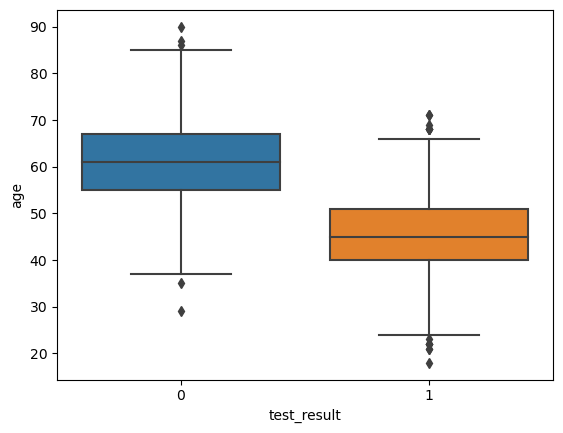

In [4]:
sns.boxplot(x='test_result', y='age', data=df) 
#the older folks are the less likely they will pass the hearing test

<AxesSubplot:>

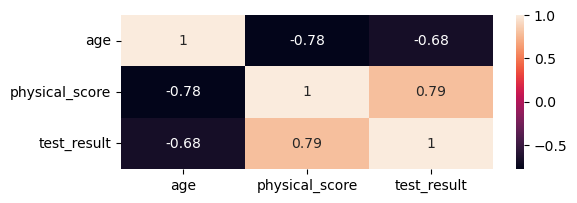

In [5]:
plt.figure(figsize=(6, 2))

sns.heatmap(df.corr(), annot=True)

#### Separate X features & y labels

In [6]:
X = df.drop('test_result', axis=1)
y = df['test_result']

#### Split Training/Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Feature Scaling (Standard Scaler)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Train the model

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

#### Test the model

In [10]:
y_pred = model.predict(scaled_X_test)

In [11]:
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
2584,0,0
801,1,0
798,1,1
2934,0,0
4545,1,1


#### Evaluate the model

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

model.coef_
#the first value says as Age increases, the odds decrease of passing (1) the hearing test (thus the "-" sign)
# the second value says as physical_test_score increases, the odds increase of passing (1) the hearing test (positive sign)

#in addition, the value of these two says that physical_score is stronger predictor

array([[-0.94953524,  3.45991194]])

In [13]:
print(accuracy_score(y_test, y_pred))
#93% accurate model. 93% of the time given Age and Physical Score we can predict if they will pass the test

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

# if the precision and recall are close to the accuracy then you don't have issues of inbalanced dataset (no major issues)

0.93
0.9331210191082803
0.9543973941368078
0.9436392914653785


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


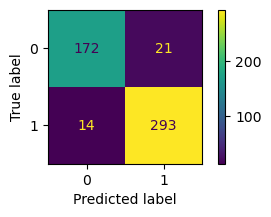

In [14]:
#confusion_matrix(y_test, y_pred)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(4, 2)

In [15]:
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report # this breaks down the metrics by class 

,precision,recall,f1-score,support
0,0.924731,0.891192,0.907652,193.00
1,0.933121,0.954397,0.943639,307.00
accuracy,0.930000,0.930000,0.930000,0.93
macro avg,0.928926,0.922795,0.925646,500.00
weighted avg,0.929883,0.930000,0.929748,500.00


In [16]:
# can also predict probability for a point, not just for the class (1, or 0)
probability_data = model.predict_proba(scaled_X_test)
new_df['PercentChance0Class'] = probability_data[:, 0]
new_df['PercentChance1Class'] = probability_data[:, 1]
new_df

#for the first row
# there is 97.6% chance of belonging to class 1
# there is 2.38% chance of belonging to class 0

,y_test,y_pred,PercentChance0Class,PercentChance1Class
1718,1,1,0.023843,0.976157
2511,1,1,0.026924,0.973076
345,0,0,0.989194,0.010806
2521,1,1,0.001908,0.998092
54,0,0,0.975013,0.024987
...,...,...,...,...
4770,1,1,0.044007,0.955993
188,1,1,0.186805,0.813195
3335,0,0,0.980608,0.019392
4583,0,0,0.994715,0.005285


#### ROC curve

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


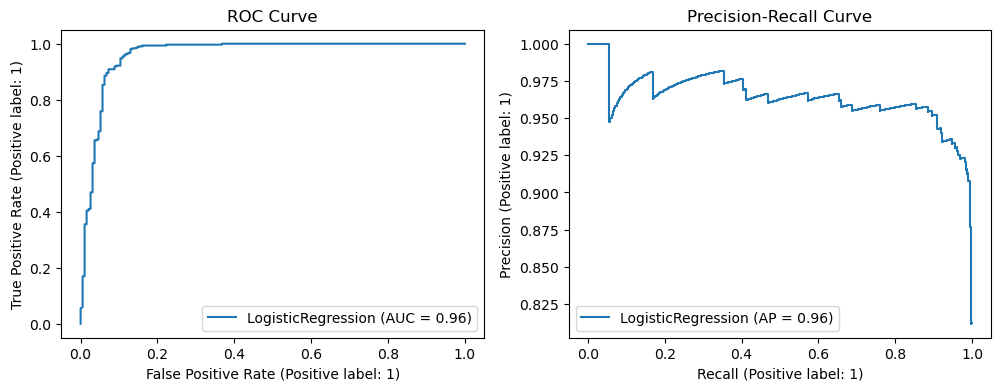

In [17]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_roc_curve(model, scaled_X_test, y_test, ax=ax1)
ax1.set_title('ROC Curve')

plot_precision_recall_curve(model, scaled_X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

plt.show()

#Need to understand these Curves better

#### Visualize

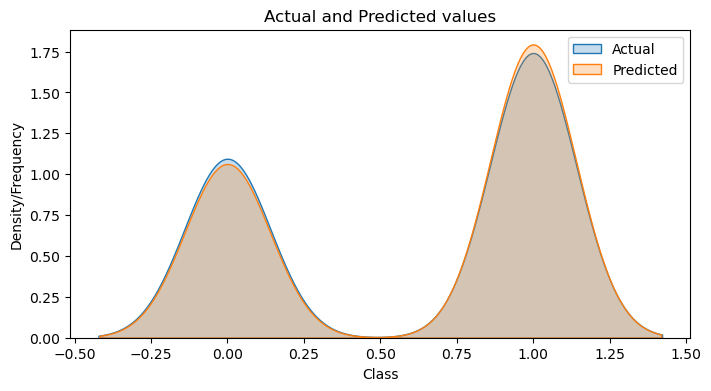

In [18]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred largely overlap, thus the predictions are closely aligned with the actual values.

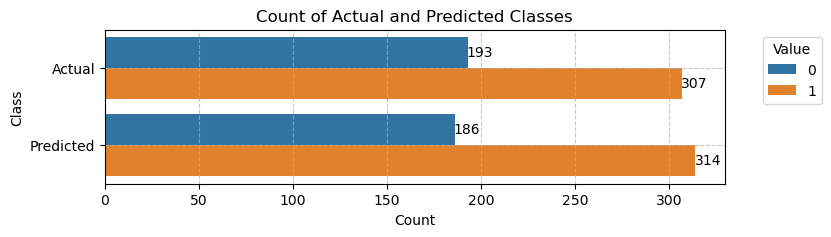

In [19]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(8, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict future patient

In [20]:
model.predict(scaler.transform([[33, 40]]))
#if patient is age 33 and has physical score of 40, then they will pass the hearing test

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
model.predict_proba(scaler.transform([[33, 40]]))
# the model is 99.4% sure that this new patient belongs to 1 class (in other words that it will pass the hearing test)

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.00574915, 0.99425085]])